## Stats

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab

In [2]:
import warnings
warnings.simplefilter("ignore")

## Measures of central tendency

In [3]:
l=[150,152,153,151,154,156,155]
np.mean(l)

153.0

In [4]:
np.median(l)

153.0

In [5]:
st.mode(l)

ModeResult(mode=array([150]), count=array([1]))

## Measures of Dispersion/Spread

- **variance** matric is used when mean fails

#### variance

In [6]:
np.var(l)

4.0

#### Standard Deviationn

In [7]:
np.std(l)

2.0

#### Range

In [8]:
range1=np.max(l)-np.min(l)
range1

6

- Quartile 

### Percentile

In [9]:
l=[2,2,3,4,5,5,5,6,7,8,8,8,8,8,9,9,10,10,11,12] ## index start from 1 not 0
len(l)

20

In [10]:
## 25 percentile and 20 percentile
## step 1 data should be sorted


In [11]:
25*(21)/100## index value

5.25

- so here 25 percentile is 5 
- 25 % data points in our data is less than 5

In [12]:
20*(21)/100

4.2

In [13]:
np.percentile(l,[20,25,30]) ## direct value of percentile in data

array([4.8, 5. , 5. ])

In [14]:
np.quantile(l,[.20,.25,.30])

array([4.8, 5. , 5. ])

- 25 % data points in our data is less than 5
- 20 % data points in our data is less than 4
- 30 % data points in our data is less than 5

In [15]:
## students scroes are 40,45,49,53,61,65,71,79,85,91. what is the percentile for scroe 71

In [16]:
percentile=(6/10)*100
percentile

60.0

- 71 marks is 60 percentile of total percentile

## Measures of symmetry
- it is called skewness

In [17]:
a=[150,151,135,156,157,200,201,145,167,189,170,156]
st.skew(a)

0.6156693097601358

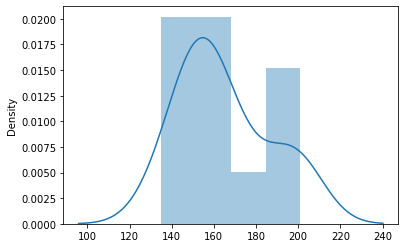

In [18]:
sns.distplot(a);

## Measures of peakness
- it is called kurtosis
- standard value excxess kurtosis=0
-  standard value kurtosis=3

- by default it gives excess kurtosis

In [19]:
st.kurtosis(a) ## Excess kurtosis

-0.830564905210788

- fisher= false gives normal kurtosis

In [20]:
st.kurtosis(a,fisher=False) ## kurtosis

2.169435094789212

In [21]:
# loc is mean
# scale is std deviation
a=np.random.normal(loc=60,scale=5,size=10000)

## QQ plot

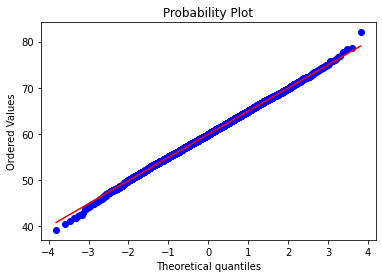

In [22]:
import pylab
st.probplot(a,dist="norm",plot=pylab);

### if all the point or 99% of point lies on the red line than it is normal distribution

In [23]:
np.mean(a)

59.901466569490175

In [24]:
np.median(a)

59.872214441586806

In [25]:
st.mode(a)

ModeResult(mode=array([39.11784146]), count=array([1]))

### here mode value is takem  due to random values hence most reliable method is QQ Plot

In [26]:
st.skew(a)

-0.01878237938900192

### here skweness is very close to 0 so we can say it is normal distribution

## Transformation

In [27]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


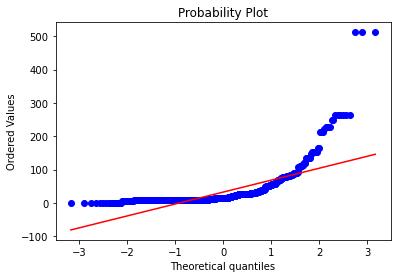

In [28]:
st.probplot(df["fare"],dist="norm",plot=pylab);

In [29]:
df["fare"].skew()

4.787316519674893

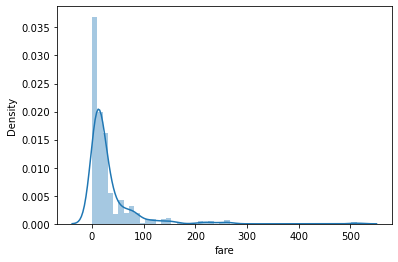

In [30]:
sns.distplot(df["fare"]);

In [31]:
df["fare"].mean()

32.2042079685746

In [32]:
df["fare"].mode()

0    8.05
Name: fare, dtype: float64

In [33]:
df["fare"].median()

14.4542

- it is not a normal disribution since we check it from all the methods

- since it is right skewed so we use **log transformation**
- np.log(df["fare"])


In [34]:
from sklearn.preprocessing import FunctionTransformer
f=FunctionTransformer(func=np.log1p)
fare_t=f.fit(df["fare"])
fare_t

FunctionTransformer(func=<ufunc 'log1p'>)

In [35]:
fare_t=f.fit_transform(df["fare"])
fare_t

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

In [36]:
## now checking

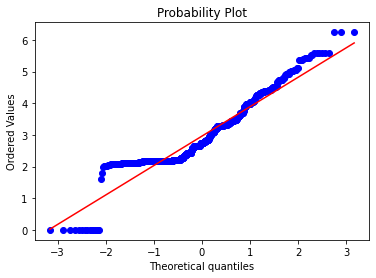

In [37]:
st.probplot(fare_t,dist="norm",plot=pylab);

In [38]:
st.skew(fare_t)

0.39426283638993376

- now we can see our data is in acceptable range

In [39]:
df=pd.DataFrame({"weight":[12,10,15,16,34,56,26,78,68,12,50,76,45],"height":[123,100,155,160,134,156,126,178,168,180,150,176,120]})
df
 


,weight,height
0,12,123
1,10,100
2,15,155
3,16,160
4,34,134
5,56,156
6,26,126
7,78,178
8,68,168
9,12,180


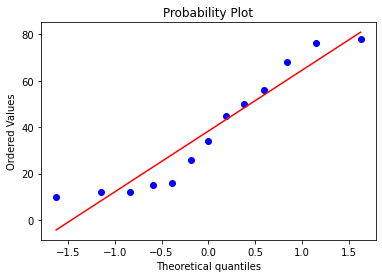

In [40]:
st.probplot(df["weight"],dist="norm",plot=pylab);


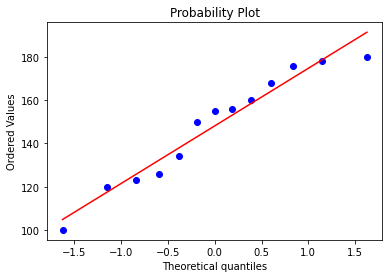

In [41]:
st.probplot(df["height"],dist="norm",plot=pylab);

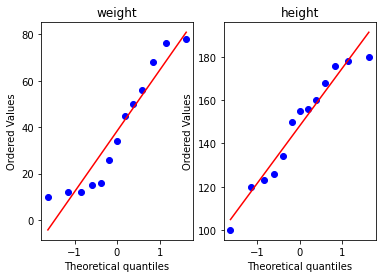

In [42]:
index=1
for i in df.columns:
    plt.subplot(1,2,index)
    st.probplot(df[i],dist="norm",plot=pylab)
    plt.title(i)
    index=index+1

In [43]:
df["weight"].skew()

0.3879780248754408

In [44]:
st.skew(df["height"])

-0.3840267407133467

In [45]:
for i in df.columns:
    print(i,"---",df[i].skew())

weight --- 0.3879780248754408
height --- -0.4360447685611474


- **box-cox** transformation

In [46]:
from sklearn.preprocessing import PowerTransformer 

In [47]:
pt=PowerTransformer(method="box-cox")## default method="yeo-johnson"
tt=pt.fit_transform(df)
print(tt)

[[-1.21732037 -1.05620653]
 [-1.42778272 -1.76673516]
 [-0.95095624  0.20311513]
 [-0.87206859  0.42876428]
 [ 0.11436277 -0.65916189]
 [ 0.83831087  0.24761598]
 [-0.25086416 -0.95161982]
 [ 1.35310366  1.30648976]
 [ 1.13652554  0.80619655]
 [-1.21732037  1.41036327]
 [ 0.66861387 -0.01468167]
 [ 1.31172256  1.20388976]
 [ 0.5136732  -1.15802967]]


In [48]:
df1=pd.DataFrame(tt,columns=["weight_transform","height_transform"])
df1

,weight_transform,height_transform
0,-1.217320,-1.056207
1,-1.427783,-1.766735
2,-0.950956,0.203115
3,-0.872069,0.428764
4,0.114363,-0.659162
5,0.838311,0.247616
6,-0.250864,-0.951620
7,1.353104,1.306490
8,1.136526,0.806197
9,-1.217320,1.410363


In [49]:
for i in df1.columns:
    print(i,"---",df1[i].skew())

weight_transform --- -0.07248975464725532
height_transform --- -0.1735776482534124


In [50]:
df=pd.DataFrame({"weight":[0,10,-1,16,34,56,26,78,68,12,50,76,45],"height":[123,100,155,160,134,156,126,178,168,180,150,176,120]})
df
 


,weight,height
0,0,123
1,10,100
2,-1,155
3,16,160
4,34,134
5,56,156
6,26,126
7,78,178
8,68,168
9,12,180


In [51]:
pt=PowerTransformer(method="box-cox")## default method="yeo-johnson"
tt1=pt.fit_transform(df)
print(tt1)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

- The Box-Cox transformation can only be applied to strictly positive data


- **Yeo Johnson** Transformation

In [52]:
pt=PowerTransformer()## default method="yeo-johnson"
tt2=pt.fit_transform(df)
print(tt2)

[[-1.60934489 -1.05619279]
 [-0.83065935 -1.76644342]
 [-1.79160331  0.20293709]
 [-0.53866185  0.42861634]
 [ 0.13529655 -0.65926863]
 [ 0.77281523  0.24744223]
 [-0.13895017 -0.95164213]
 [ 1.30846805  1.30665815]
 [ 1.07435498  0.80614584]
 [-0.72697872  1.41058993]
 [ 0.61164413 -0.01486908]
 [ 1.26273104  1.20400489]
 [ 0.47088833 -1.15797842]]


In [53]:
df2=pd.DataFrame(tt2,columns=["weight_transform","height_transform"])
df2

,weight_transform,height_transform
0,-1.609345,-1.056193
1,-0.830659,-1.766443
2,-1.791603,0.202937
3,-0.538662,0.428616
4,0.135297,-0.659269
5,0.772815,0.247442
6,-0.138950,-0.951642
7,1.308468,1.306658
8,1.074355,0.806146
9,-0.726979,1.410590


## Standard Normal Deviation

In [54]:
a=np.random.normal(loc=60,scale=10,size=10000)

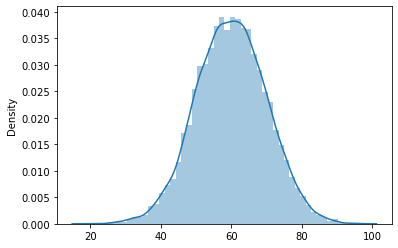

In [55]:
sns.distplot(a);

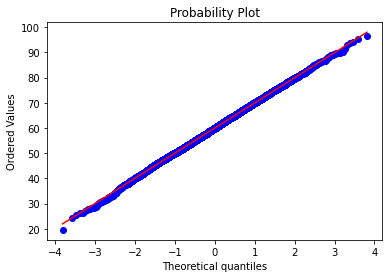

In [56]:
st.probplot(a,dist="norm",plot=pylab);

### Manuualy Zscores formula to convert ND to SND 


In [57]:
l=[]
for i in a:
    z=(i-60)/10
    l.append(z)

In [58]:
l# trnasfomed values

[0.39443667906012647,
 0.22732929427109383,
 1.471276696893034,
 -0.742818779672038,
 -0.07463775224107394,
 1.616113720931348,
 -0.827670014865916,
 0.6993786049838079,
 0.1549412402617662,
 -0.31412065614276585,
 -0.13111202259986426,
 0.6421674594863476,
 -0.6336034851154814,
 -0.9803425632560412,
 0.9083350047158987,
 0.6779411163147785,
 1.7114867102938092,
 -0.3801524490912193,
 -0.2386124258098576,
 1.1114667479525608,
 -0.7035310183661636,
 -1.0242993936482692,
 -0.08108961888950575,
 0.21836946942078866,
 1.2711302229570465,
 0.9369340701150037,
 1.701656462042564,
 0.20551749112586606,
 0.42618411925903243,
 0.09243382630924443,
 1.1647216294362082,
 -0.1770546391092182,
 0.998745877293905,
 -0.10918107938439334,
 2.580643182354352,
 1.5877008820428742,
 -0.1868821344977853,
 0.8679030360812376,
 2.0299605715777758,
 -0.45688454532327044,
 -0.9407165249631788,
 1.9065419015082412,
 -0.7791068174558411,
 -0.16944799811905398,
 -0.28012185486353475,
 1.9922432776040495,
 -1.274

In [59]:
np.mean(l)

-0.0019443260813344055

In [60]:
np.std(l)

0.9971301104304308

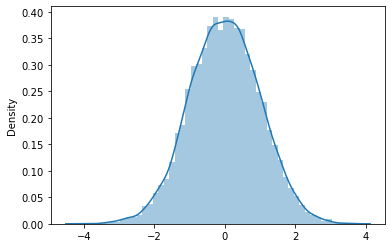

In [61]:
sns.distplot(l);

## Scaling
### The penomena which convert ND to SND is called Scaling this scaling is called standardisation
- Standarddisation method (when data is normally distribution)
- min-max scaler method (when data is not normally distribution)

### Min-Max Scalor

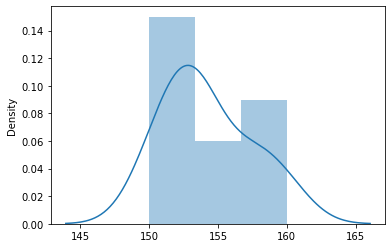

In [62]:
a=[150,154,153,160,154,153,152,151,157,158]
sns.distplot(a);

In [63]:
st.skew(a)

0.5445260694579825

### Min-Max formula

In [64]:
l=[]
for i in a:
    sacled=(i-min(a))/(max(a)-min(a))
    l.append(sacled)

In [65]:
l

[0.0, 0.4, 0.3, 1.0, 0.4, 0.3, 0.2, 0.1, 0.7, 0.8]

## Standardisation method 

In [66]:
df=pd.DataFrame({"age":[20,30,40,50,55,25,60],"salary":[10000,120000,125000,15000,20000,40000,5000]})
df

,age,salary
0,20,10000
1,30,120000
2,40,125000
3,50,15000
4,55,20000
5,25,40000
6,60,5000


In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_df=scaler.transform(df)
scaled_df

array([[-1.38961667, -0.78348892],
       [-0.69480833,  1.4930638 ],
       [ 0.        ,  1.59654347],
       [ 0.69480833, -0.68000926],
       [ 1.0422125 , -0.57652959],
       [-1.0422125 , -0.16261091],
       [ 1.38961667, -0.88696859]])

In [68]:
df=pd.DataFrame(scaled_df,columns=["Sacled_Age","Sacled_Salary"])
df

,Sacled_Age,Sacled_Salary
0,-1.389617,-0.783489
1,-0.694808,1.493064
2,0.000000,1.596543
3,0.694808,-0.680009
4,1.042213,-0.576530
5,-1.042213,-0.162611
6,1.389617,-0.886969


## Min-Max Scalor

In [69]:
df=pd.DataFrame({"weight":[12,10,15,16,34,56,26,78,68],"height":[123,100,155,160,134,156,126,178,186]})
df

,weight,height
0,12,123
1,10,100
2,15,155
3,16,160
4,34,134
5,56,156
6,26,126
7,78,178
8,68,186


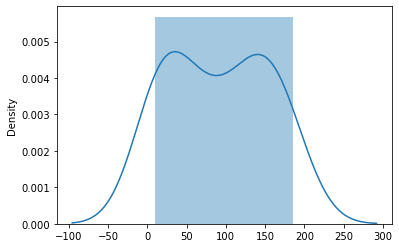

In [70]:
sns.distplot(df);

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df)
scaled_df=scaler.transform(df)
scaled_df

array([[0.02941176, 0.26744186],
       [0.        , 0.        ],
       [0.07352941, 0.63953488],
       [0.08823529, 0.69767442],
       [0.35294118, 0.39534884],
       [0.67647059, 0.65116279],
       [0.23529412, 0.30232558],
       [1.        , 0.90697674],
       [0.85294118, 1.        ]])

In [72]:
df=pd.DataFrame(scaled_df,columns=["Sacled_Age","Sacled_Salary"])
df

,Sacled_Age,Sacled_Salary
0,0.029412,0.267442
1,0.000000,0.000000
2,0.073529,0.639535
3,0.088235,0.697674
4,0.352941,0.395349
5,0.676471,0.651163
6,0.235294,0.302326
7,1.000000,0.906977
8,0.852941,1.000000


## Application of Z-score or why we need Standardisaton
- to bring the data into same scale
- to know what precent of data lies less than particular value
- how many standard deviation away a given value lies from a population mean
- it allows us to get the percentiles which helps to determine the performance of individual with other(in same distribution)
- it allows us to calculate the probabilites less than or greater than a particular value
- it allows us to compare the individual score in differnet distribution
- to detect the outliers

### how many standard deviation away a given value lies from a population mean

In [73]:
## find the std.deviation of 153 form mean or how far 153 from mean in std.deviation?

In [74]:
a=[150,151,152,153,152,150,153,160,163]
a

[150, 151, 152, 153, 152, 150, 153, 160, 163]

In [75]:
np.mean(a)

153.77777777777777

In [76]:
np.std(a)


4.3147750753216885

In [77]:
z=(153-153.7)/4.3
z

-0.16279069767441598

## Find the probabilities using Z-score

### suppose we have an population of 60 year old men.The mean bmi is 29 and sd is 6. if a man is randomly selected then what is the probalility that his bmi will be less then 30

In [78]:
z=(30-29)/6
z
# it means bmi of 30 is 0.16 sd from the mean
# ztalbe.net in goggle and find the crossponding value of .16(0.53)

0.16666666666666666

 ## Find percentiles using Z-score

### suppose the scores on a certain entrance exam are roughly normally distributed with a mean of 82 and a sd of 5.if certain student recieved a 90 on the exam.how well he performrd in the exam relatively wtr to others and also tell whether u r in top 10% or not


In [79]:
z=(90-82)/5
z
# ztalbe.net in goggle and find the crossponding value of 1.6(0.95)

1.6

- this means that this student recieved a score that was 1.6 standard deviation above the mean

In [80]:
0.95*100

95.0

- he performed 95% better thaan others

## analyse certain newborn weight compare to mean weight of all babies
### it is well documented that the weight of newborn are normally distributed with a mean about 7.5 ponds and a sd of 0.5 pounds if a certain newborn weughts 7.7 pounds to know how % of babies weight greater than his weight

In [81]:
z=(7.7-7.5)/.5
z

0.40000000000000036

- this means that baby weight o.4 sd ABOVE the mean
- ztalbe.net in goggle and find the crossponding value of 1.6(0.65542)


In [82]:
1-.65542


0.34458

In [83]:
0.34458*100

34.458

- 34.458 % of babies weight greater than his weight

### In india the average IQ is 100 with the sd of 15 what % of population would u expect to have IQ lower than 85

In [84]:
z=(85-100)/15
z

-1.0

- ztalbe.net in goggle and find the crossponding value of 1.6(0.1586)


In [85]:
.1586*100

15.86

- in India 15.86% population have IQ lower than 85

### The salaries of employees at XYZ corporation follw a normal distribution with a mena 60k and sd7500.Whatr proportion of employee eacrn approx between 69000 and 78000

In [86]:
z1=(69000-60000)/7500
z1

1.2

In [87]:
z2=(78000-60000)/7500
z2

2.4

- so we are interested in region 1.2<z<2.4 p(1.2<z<2.4)=p(z(2.4)-p(z(1.2)))

In [88]:
#p(z(2.4))=0.9918 from z talbe
#p(z(1.2))=0.8849
#so
0.9918-0.8849

0.1069

In [89]:
0.1069*100

10.69

- so around 10% of employees salaries lies in this region

## Comparing in different distribution

### A student participated in two quizzes. in the first quiz he scored 80 and in other he scored 75.The mean and standard deviation of first quiz  are 70 and 15 respectively. while th mean and standard deviation of second quiz is 54 and 12 respectively.the results follow the noraml distributed. in which quiz he performed better



In [90]:
z1=(80-70)/15
z1

0.6666666666666666

- p value 0.7437 at 0.66 means he performed 74.5% better than others

In [91]:
z2=(75-54)/12
z2

1.75

- p value 0.95994 at 1.75 means he performed 95.99% better than others
- so in 2nd quiz he performed well

## Covariance And Corelation

### Covariance

In [92]:
df=pd.DataFrame({"temp":[98,87,90,85,95,75],"no_Custumer":[15,12,10,10,16,7]})
df

,temp,no_Custumer
0,98,15
1,87,12
2,90,10
3,85,10
4,95,16
5,75,7


In [93]:
df["temp-mean_temp"]=df["temp"]-df["temp"].mean()
df

,temp,no_Custumer,temp-mean_temp
0,98,15,9.666667
1,87,12,-1.333333
2,90,10,1.666667
3,85,10,-3.333333
4,95,16,6.666667
5,75,7,-13.333333


In [94]:
df["no_Custumer-mean_no_Custumer"]=df["no_Custumer"]-df["no_Custumer"].mean()
df

,temp,no_Custumer,temp-mean_temp,no_Custumer-mean_no_Custumer
0,98,15,9.666667,3.333333
1,87,12,-1.333333,0.333333
2,90,10,1.666667,-1.666667
3,85,10,-3.333333,-1.666667
4,95,16,6.666667,4.333333
5,75,7,-13.333333,-4.666667


In [95]:
df["multiply"]=df["temp-mean_temp"]*df["no_Custumer-mean_no_Custumer"]
df

,temp,no_Custumer,temp-mean_temp,no_Custumer-mean_no_Custumer,multiply
0,98,15,9.666667,3.333333,32.222222
1,87,12,-1.333333,0.333333,-0.444444
2,90,10,1.666667,-1.666667,-2.777778
3,85,10,-3.333333,-1.666667,5.555556
4,95,16,6.666667,4.333333,28.888889
5,75,7,-13.333333,-4.666667,62.222222


In [96]:
df["multiply"].sum()

125.66666666666666

In [97]:
df["multiply"].sum()/6

20.944444444444443

- here positive covariance between temp and no_customer columns

In [98]:
l=[[650,19812,77200],[785,23926,998000],[1200,36576,1200000],[720,21945,800000],[975,29718,895000]]
df=pd.DataFrame(l,columns=["size_cm","size_ft","price"])
df




,size_cm,size_ft,price
0,650,19812,77200
1,785,23926,998000
2,1200,36576,1200000
3,720,21945,800000
4,975,29718,895000


## Covariance
- it depends on  unit 
- does not meausres the strength of relation

In [99]:
df.cov()

,size_cm,size_ft,price
size_cm,49492.5,1.508570e+06,7.101045e+07
size_ft,1508569.5,4.598236e+07,2.164357e+09
price,71010450.0,2.164357e+09,1.826228e+11


## Corelation
- it is unit less 
- And also meausres the strength of relation

In [100]:
df.corr()

,size_cm,size_ft,price
size_cm,1.000000,1.000000,0.746922
size_ft,1.000000,1.000000,0.746888
price,0.746922,0.746888,1.000000


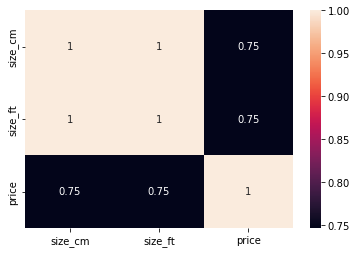

In [101]:
sns.heatmap(df.corr(),annot=True);

## Probability

- it is a chance of occurance 
### random variable- set of all possible values outcomes of particular event
- 1 discrete(countable)
- 2 continous (non-countable)

### mutually exclusive event
- two or more events can not occur simultaneously. it is not possible to get 5 and 4 on single roll dice.
eg: the probability of getteing either 2 or 3 when we roll a dice.
- 
p(a union b )=p(a)+p(b)= 1/6+1/6


here p(a intersection b) is 0
## non-mutual exclusive:
let A be the event as student plays hockey and B be the event  that student plays cricket. so there is achances that student plays both so its not mutully exclusive.


out of 50 students in the class. 30 students play hockey . 25 students play cricket and 15 students play both.What is the probability of selected student plays either hockey or cricket.


p(A Union B)=p(A)+p(B)-p(A intersection B)


## Probability Distribution
- if prob dist is of continous random varibale it is called PDF(probability density function)or(probability distribution function)
- if prob dist is of decrete random varibale it is called PMF(probability mass function)
## CDF(cummulative Distribution Function)


## PMF - probability of discrete random varibale

In [102]:
l=[1,2,3,4,5,6]
df=pd.DataFrame(l,columns=["Dice"])
df

,Dice
0,1
1,2
2,3
3,4
4,5
5,6


In [103]:
prob=df["Dice"].value_counts(normalize=True)
x=prob.reset_index()
x

,index,Dice
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [104]:
x.rename(columns={"index":"dice","Dice":"prob"},inplace=True)
x

,dice,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


## PMF(probability mass function)

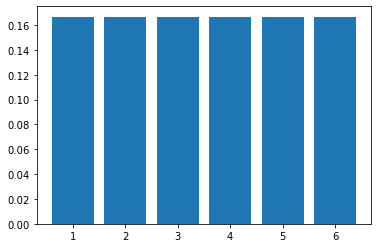

In [105]:
plt.bar(x["dice"],x["prob"]);

In [106]:
x["cdf"]=np.cumsum(x["prob"])
x

,dice,prob,cdf
0,1,0.166667,0.166667
1,2,0.166667,0.333333
2,3,0.166667,0.500000
3,4,0.166667,0.666667
4,5,0.166667,0.833333
5,6,0.166667,1.000000


## CDF(cummulative Distribution Function)

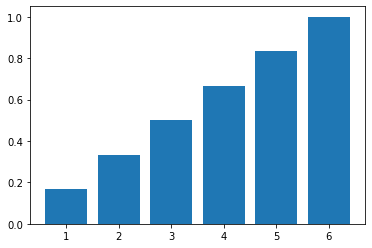

In [107]:
plt.bar(x["dice"],x["cdf"]);

## PDF(probability density/distribution function)
- in this we have to considered area and calculate z-score

In [108]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [109]:
iris_setosa=iris[iris["species"]=="setosa"]
iris_versicolor=iris[iris["species"]=="versicolor"]
iris_virginica=iris[iris["species"]=="virginica"]


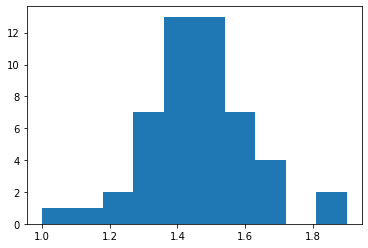

In [110]:
plt.hist(iris_setosa["petal_length"]);


In [111]:
counts,bins=np.histogram(iris_setosa["petal_length"])
counts

array([ 1,  1,  2,  7, 13, 13,  7,  4,  0,  2], dtype=int64)

In [112]:
pdf=counts/sum(counts)
pdf

array([0.02, 0.02, 0.04, 0.14, 0.26, 0.26, 0.14, 0.08, 0.  , 0.04])

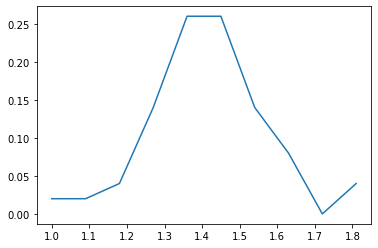

In [113]:
plt.plot(bins[:10],pdf);

In [114]:
cdf=np.cumsum(pdf)

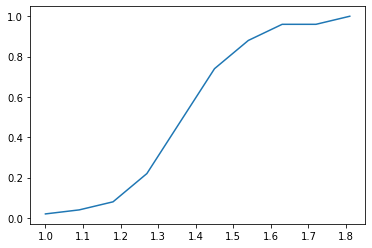

In [115]:
plt.plot(bins[:10],cdf);

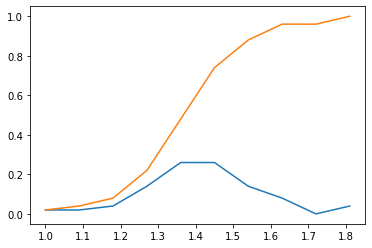

In [116]:
plt.plot(bins[:10],pdf);
plt.plot(bins[:10],cdf);

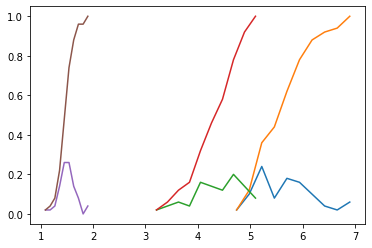

In [117]:
counts,bins=np.histogram(iris_virginica["petal_length"],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
counts,bins=np.histogram(iris_versicolor["petal_length"],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
counts,bins=np.histogram(iris_setosa["petal_length"],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf);




## Inferential Stats
- Conclution of population
## Centeral limit Theorem(CLT)
- specific to general
- It is used to conclude the any paprametre of the population
- mean of sample mean is approx = to population mean
- mean of sampling distribution( probalility of means of the samples ) approximately equal to population mean
- std.deviation=smple deviation*underroot(no.of samples)

In [118]:
(3.5+2.5+2.25+4+3+2.25+4.5+1.25+3.5+3.25)/10


3.0

In [119]:
df=pd.read_csv("E:\\data sets-20221116T065822Z-001\\data sets\\Salaries.csv")
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [120]:
df_salaries=df["TotalPay"][0:120000]
df_salaries.shape

(120000,)

In [121]:
### Method 1: 
polulation_mean=df_salaries.mean()  ##print(np.mean(df_salaries))
print("actual population mean is :",polulation_mean) ## actual mean 
polulation_std=df_salaries.std()  ## actual std 
print("actual population std is :",polulation_std)
## but this method is tedious in real scenario  . so CLT comes into picture 




actual population mean is : 80104.43551225861
actual population std is : 52460.94537685056


## using clt we can see disribution is not normal

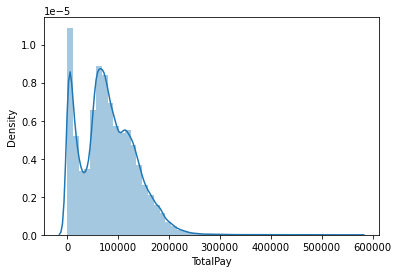

In [122]:
sns.distplot(df_salaries);

## Apply CLT

In [123]:
import numpy as np
l1=[]
a1=np.array(l1)
def sample_means(sample_size):
    l=[]
    for i in range(0,1000):  ## taking 1000 samples each of size 10
        s=df_salaries.sample(sample_size) ## random sampling
        mean=s.mean()
        l.append(mean)
    a1=np.array(l)
    print("approximate mean for population(salary) ",a1.mean())### sample means (obserevd values which is approximate to true/actual mean of population 80104.43551225861
    std_sample=a1.std()
    #print( std_sample/np.sqrt(10))
    std_population=std_sample*np.sqrt(sample_size)
    print("approximate std for population(salary) ",std_population)
    sns.distplot(a1) ;


approximate mean for population(salary)  78800.556084
approximate std for population(salary)  52943.737388549904


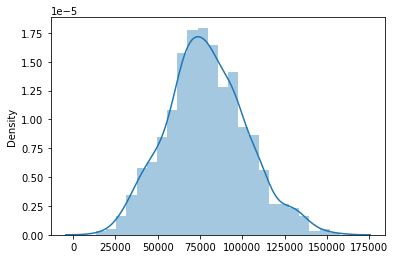

In [124]:
sample_means(5);

approximate mean for population(salary)  80063.54239099998
approximate std for population(salary)  52971.759951053624


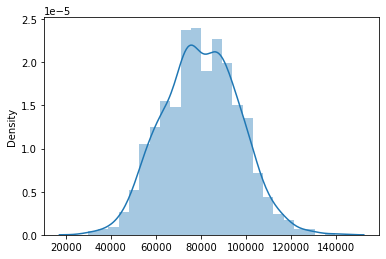

In [125]:
#Let’s use the function to calculate mean and plot the distribution for sample size =10
sample_means(10);


approximate mean for population(salary)  80498.08910666665
approximate std for population(salary)  52632.104214183026


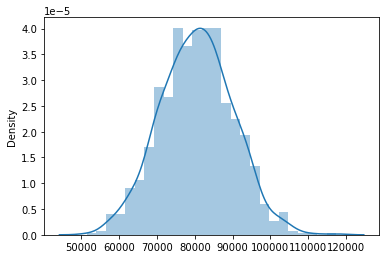

In [126]:
##Let’s use the function to calculate mean and plot the distribution for sample size =30
sample_means(30);




### calculate a 95% confidence interval for sample mean of 40 and std of 40 with a sample size=100

In [127]:
40+(1.96*40)/(100)**.5

47.84

In [128]:
40-(1.96*40)/(100)**.5

32.16

- it means 95% of values lies between 32.16 to 47.84 out of 100

## Hypothesis Testing
- General to specific
- alpha(Significance level,critical value,probability threshold) to decide the criticl region

### Q. A manufacturer of printer cartridge clams that a certain cartridge manufactured by him has a mean
### printing capacity of at least 500 pages. A wholesale purchaser selects a sample of 100 printers and
### tests them. The mean printing capacity of the sample came out to be 490 pages with a standard
### deviation of 3 printing pages.alpha is 0.05
### shuold the purchaser reject the claim of the manufacture at a significance level of 5%




## t- test

### A tyre manufacturer claims that the average life of a particular category of its tyre is 18000km
### when used under normal driving conditions. A random sample of 16 tyres was tested. The mean and
### SD of life of the tyres in the sample were 20000 km and 6000 km respectively.
### alpha=0.01



## z testand t test questions

- 1. A company used a specific brand of Tube lights in the past which has an average life of 1000 hours.
A new brand has approached the company with new Tube lights with same power at a lower price. A
sample of 120 light bulbs were taken for testing which yielded an average of 1010 hours with standard
deviation of 90 hours. Should the company give the contract to this new company at a 1% significance
level.
Also, find the confidence interval.

- 2. An online grocery shop claims that the mean delivery time is equal and greater than 120 minutes with a standard deviation of 30 minutes. A random sample of 49 orders is delivered with a mean of 100 minutes. At 95% confidence level, is there enough evidence to support the claim?


- 3. Princeton school science teacher claims that students in his section will score at most marks than those in his colleague’s section. The mean science score for 60 students in his section is 22.1, and the standard deviation is 4.8. The mean science score for 40 of the colleagues’ sections is 18.8, and the standard deviation is 8.1. At α = 0.05, can the teacher’s claim be supported?




